In [2]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns


In [3]:
#Import el csv para comenzar a analizar los datos 
df = pd.read_csv("plataformas.csv", sep=",")

Comienzo a explorar que tengo, nombre de las columnas del conjunto de dato, el tipos de dato que tiene.

In [4]:
df.head()

,Unnamed: 0,id,title,director,cast,country,date_added,release_year,rating,listed_in,description,type,duration_int,duration_type,scored
0,0,as1,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,movie,113,min,3.5
1,1,as2,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,movie,110,min,3.5
2,2,as3,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,movie,74,min,3.5
3,3,as4,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",movie,69,min,3.5
4,4,as5,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,movie,45,min,3.5


In [5]:
#Identifico la cantidad de datos que tiene mi base de datos 
df.size

258960

In [6]:
#Identifico que tipos de dato tengo 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17264 entries, 0 to 17263
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17264 non-null  int64  
 1   id             17264 non-null  object 
 2   title          17264 non-null  object 
 3   director       10630 non-null  object 
 4   cast           12474 non-null  object 
 5   country        6137 non-null   object 
 6   date_added     7720 non-null   object 
 7   release_year   17264 non-null  int64  
 8   rating         17264 non-null  object 
 9   listed_in      17264 non-null  object 
 10  description    17260 non-null  object 
 11  type           17264 non-null  object 
 12  duration_int   17264 non-null  int64  
 13  duration_type  16785 non-null  object 
 14  scored         17264 non-null  float64
dtypes: float64(1), int64(3), object(11)
memory usage: 2.0+ MB
None


id,title,director,cst,country,data_Added,rating,listed_in,description,type y duration type son tipos de datos object. 
 
release_Year y duration_type son de tipo int  
 
Scored que es el unico dato de tipo float


In [7]:
#Identifico los nulos de cada columna
df.isnull().sum() 

Unnamed: 0           0
id                   0
title                0
director          6634
cast              4790
country          11127
date_added        9544
release_year         0
rating               0
listed_in            0
description          4
type                 0
duration_int         0
duration_type      479
scored               0
dtype: int64

Analizando tanto director(6616) archivos nulos, cast(4780), country(11.127) es el que mas valores nulos tiene, data_added(9544), descripcion(4), 
duration_type(479). Hay un total de 32.550 datos nulos de 258.960

Identifico los valores atipicos utilizando la tecnica de valores extremos(outliers)

In [8]:
df = df.drop("Unnamed: 0", axis=1)

In [9]:
df.describe()

,release_year,duration_int,scored
count,17264.000000,17264.000000,17264.000000
mean,2010.035334,63.819335,3.533243
std,16.922904,52.339853,0.057195
min,1920.000000,0.000000,3.300000
25%,2008.000000,2.000000,3.500000
50%,2017.000000,81.000000,3.500000
75%,2020.000000,100.000000,3.600000
max,2021.000000,601.000000,3.700000


Lo que puedo observar en la columna duration_int es que la media  es de 63,819335 lo que significa que el promedio de duracion de las peliculas es de aproximadamente 64 minutos. La desviacion estandar(str) es de 52.339853 que sugiere que hay una gran variabilidad de duracion de las peliculas. 
La media de la columna scored es de 3.533243 lo que indica es que la clasificacion promedio es de 3.5 aproximadamente en una escala de 1 a 5. Y tiene una desviacion estandar de 0.057

Con respecto a la columna release_year muestra informacion sobre el año de lanzamientos de las peliculas. En min nos muestra la pelicula mas antigua que su lanzamiento fue en 1920. 
La pelicula mas reciente de esta base de datos la tenemos indicada en max que fue en 2021.

El 25 % de las peliculas tiene una duracion de 2 min o menos y un score de 3.5.
 
La mitad de las peliculas el 50% tiene una duracion de 81 minutos o mas y un score de 3.5.  
 
Mientras que el 75% tiene una duracion de 100 min o menos con un score de 3.6 (un escore mayor a las anteriores)


Otra cosa que pude notar en que el rango de puntuaciones es de 3.3 a 3.7, lo que signica que todas las peliculas estan relativamente bien valoradas en genereal

-------------------------------------------------------------------------------------

HISTOGRAMA: 
Voy a realizar un histograma para entender como se distribuyen las duraciones de las peliculas en la base de datos

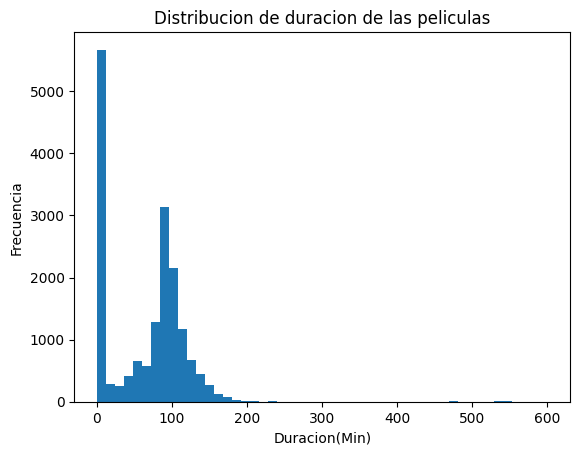

In [10]:
plt.hist(df["duration_int"], bins=50) 
plt.title("Distribucion de duracion de las peliculas") 
plt.xlabel("Duracion(Min)") 
plt.ylabel("Frecuencia") 
plt.show()

En este caso la frecuencia se refiere a la cantidad de peliculas que tienen una duracion dentro de cada intervalo del histograma

En este grafico puedo ver que hay mas 5000 peliculas en la base de datos que duran 20 min, como tambien una poca cantidad que duran mas de 200 min

--------------------------------------------------------------------------------------------------------

BOXPLOT

Con boxplot voy a visualizar la distribucion de datos y ver posibles valores atipicos. Pero lo voy a visualizar con score para ver los puntajes de las peliculas

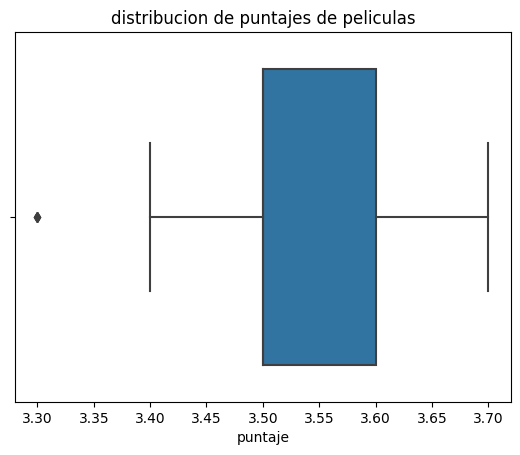

In [11]:
sns.boxplot(x=df["scored"]) 
plt.title("distribucion de puntajes de peliculas") 
plt.xlabel("puntaje")  
plt.show()


En un principio puedo notar que la media de los puntajes de las peliculas esta entre 3.50 y 3.60. El maximo esta en 3.70 de puntaje y el minimo 3.40. Pero como pueden ver el rombo nos muestra un valor atipico que es un puntaje de 3.30. 
Como conclucion con este grafico saco el valor atipico que 3.30 de puntaje

--------------------------------------------------------------------------------------------

Muestro el numero de peliculas y series lanzadas cada año 

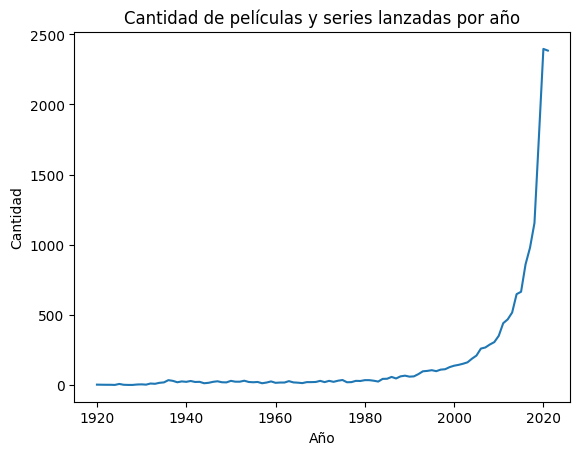

In [12]:

year_counts = df['release_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.title('Cantidad de películas y series lanzadas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Analizando el grafico saco la conclucion que a partir del 2000 al 2020 hubo un aumento significativo de la cantidad

-------------------------------------------------------------------------------

DIAGRAMA DE DISPERCION

El diagrama de dispercion me permite visualizar la relacion entre dos variable. En este caso utilice la duracion y el puntaje. Y tambien poder ver valores atipicos.

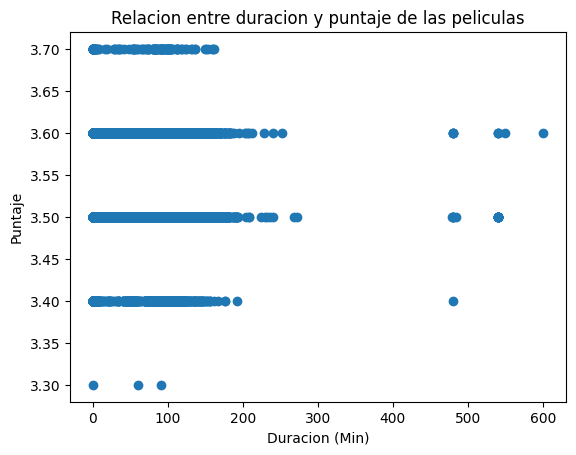

In [13]:
plt.scatter(x=df["duration_int"], y=df["scored"]) 
plt.title("Relacion entre duracion y puntaje de las peliculas")  
plt.xlabel("Duracion (Min)") 
plt.ylabel("Puntaje") 
plt.show()


En este caso podemos ver varias cosas. En un principio puedo notar valores atipicos, si notamos en el eje x que esta la duracion hay peliculas con una duracion de entre 400 y 600 minutos que a mi entender es una duracion exagerada. Tambien puedo notar que la duracion en relacion con el puntaje esta muy equilibrada, lo que sugiere que no hay una correlación clara entre estas dos variables.

-----------------------------------------------------------------------------------------

ANALISIS DE CORRELACION

Analizo la correlacion entre las variables

C:\Users\Bounset\AppData\Local\Temp\ipykernel_19540\2202312010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


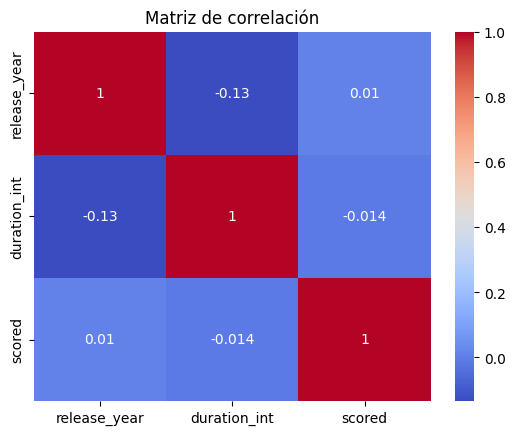

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

No hay altas correlacion porque no estan cerca de 1 ni de -1. Lo que es una buena señal que no haya fuerte correlaciones entre las variables. Como conclucion las tengo que dejar

-----------------------------------------------------------------------------------------------------------

Analisis de variables categoricas

Voy a analizar los diferentes generos

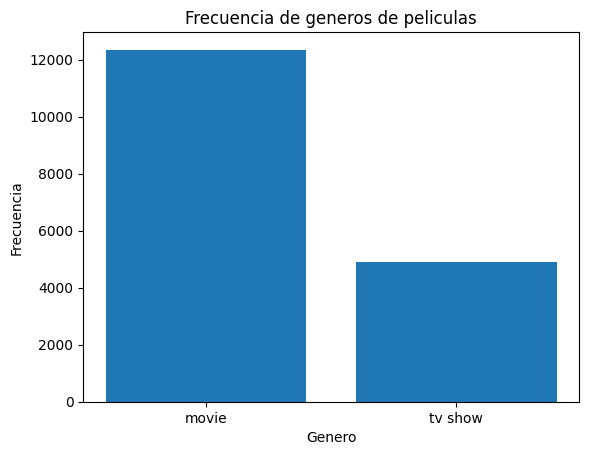

In [15]:
counts = df["type"].value_counts() 
plt.bar(counts.index, counts.values) 
plt.title("Frecuencia de generos de peliculas") 
plt.xlabel("Genero") 
plt.ylabel("Frecuencia") 
plt.show()

Con este grafico muestro que en el genero hay mucha mas peliculas(120000) que Tv show(4500)

ANALISIS DE DISTRIBUCIONES

Distribucion de las variblaes KDE plots y los rug plots

C:\Users\Bounset\AppData\Local\Temp\ipykernel_19540\70684071.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["duration_int"], shade=True)


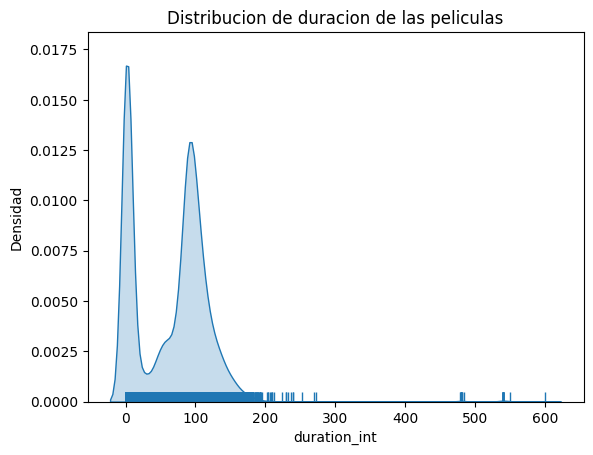

In [16]:
sns.kdeplot(df["duration_int"], shade=True) 
sns.rugplot(df["duration_int"]) 
plt.title("Distribucion de duracion de las peliculas") 
plt.ylabel("Densidad") 
plt.show()

Esto me muestra que hay grande densidad de 0 a 100, de 100 a 200 y luego hay lapsos que baja la densidad de peliculas